<a href="https://colab.research.google.com/github/dorinhazan/FinalProject-DataScience/blob/main/final_statistics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import json
import pandas as pd
import matplotlib.pyplot as plt

Merging Observable From Table And Repprts

In [2]:
# Load the two JSON files
with open("/content/merged_with_gross_classification-reports.json", "r") as f:
    reports_json = json.load(f)

with open("/content/merged_with_gross_classification-table.json", "r") as f:
    table_json = json.load(f)

# Flatten all observables from the reports JSON (nested under report names)
merged_observables = []
for report in reports_json.values():
    merged_observables.extend(report.get("observables", []))

# Merge the flattened list with the list from the table JSON
merged_combined_list = merged_observables + table_json

output_path = "/content/merged_observables_combined.json"
with open(output_path, "w") as f:
    json.dump(merged_combined_list, f, indent=2)

output_path

'/content/merged_observables_combined.json'

Get the list of observable vlaues where "type": "malware"

In [6]:
# Load MITRE ICS ATT&CK data
with open("/content/ics-attack.json", "r") as f:
    mitre_ics_data = json.load(f)

# Extract names of all entries where "type" == "malware"
malware_names = [
    obj["name"]
    for obj in mitre_ics_data.get("objects", [])
    if obj.get("type") == "malware"
]

In [4]:
# Extract malware names from 'observable_value' field
malware_name_set = set(malware_names)

# Containers for filtered and removed observables
retained_observables = []
removed_observables = []

# Filtering logic
for obs in merged_combined_list:
    fine_class = obs.get("fine_classification", "")
    stix_val = obs.get("STIX_supported", "")
    observable_val = obs.get("observable_value", "").strip().lower()

    if (
        fine_class == "Malware" or
        stix_val == "Full: Malware" or
        observable_val in malware_name_set
    ):
        removed_observables.append(obs)
    else:
        retained_observables.append(obs)

# Save retained and removed observables to separate files
filtered_path = "/content/filtered_obs_table_reports.json"
removed_path = "/content/removed_malware_obs_table_reports.json"

with open(filtered_path, "w") as f:
    json.dump(retained_observables, f, indent=2)

with open(removed_path, "w") as f:
    json.dump(removed_observables, f, indent=2)

filtered_path, removed_path

('/content/filtered_obs_table_reports.json',
 '/content/removed_malware_obs_table_reports.json')

In [8]:
with open("/content/filtered_obs_table_reports.json", "r") as f:
    all_observables = json.load(f)

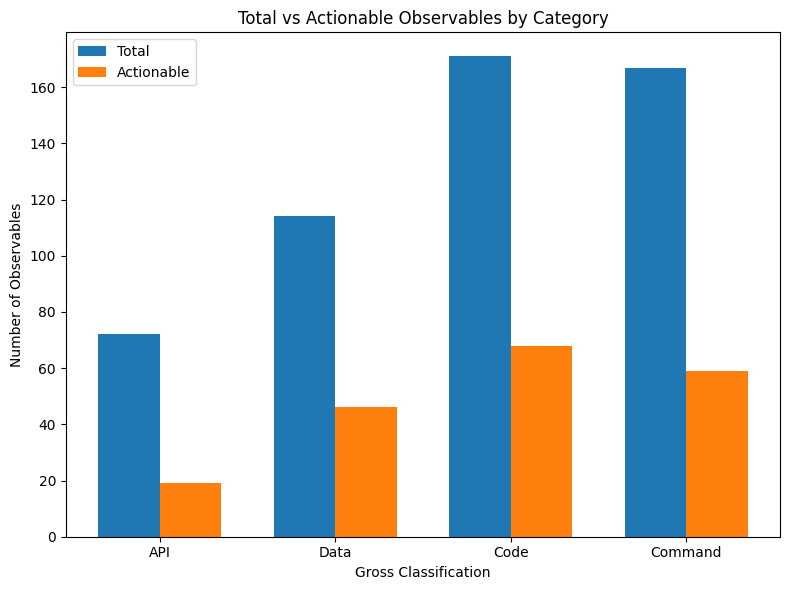

,gross_classification,total,actionable
0,API,72,19
1,Data,114,46
2,Code,171,68
3,Command,167,59


In [15]:
# Define target gross_classification values
target_categories = {"Code", "Data", "API", "Command"}
actionable_keywords = {"Actionable"}

# Count total and actionable observables for each category
category_stats = []
for category in target_categories:
    total = sum(1 for obs in all_observables if obs.get("gross_classification") == category)
    actionable = sum(
        1 for obs in all_observables
        if obs.get("gross_classification") == category and obs.get("artifact_details") in actionable_keywords
    )
    category_stats.append({
        "gross_classification": category,
        "total": total,
        "actionable": actionable
    })

# Convert to DataFrame
df_category_stats = pd.DataFrame(category_stats)

# Plotting
plt.figure(figsize=(8, 6))
bar_width = 0.35
x = range(len(df_category_stats))

plt.bar(x, df_category_stats["total"], width=bar_width, label="Total")
plt.bar([p + bar_width for p in x], df_category_stats["actionable"], width=bar_width, label="Actionable")

plt.xlabel("Gross Classification")
plt.ylabel("Number of Observables")
plt.title("Total vs Actionable Observables by Category")
plt.xticks([p + bar_width / 2 for p in x], df_category_stats["gross_classification"])
plt.legend()
plt.tight_layout()
plt.show()

df_category_stats

In [10]:
print(df_category_stats)

  gross_classification  total  actionable
0                  API     72          19
1                 Data    114          46
2                 Code    171          68
3              Command    167          59
